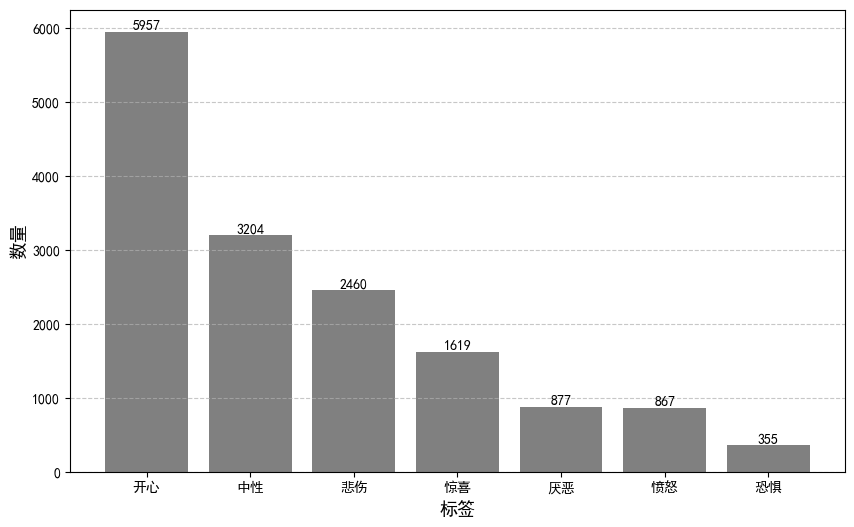

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
labels = ['开心', '中性', '悲伤', '惊喜', '厌恶', '愤怒', '恐惧']
counts = [5957, 3204, 2460, 1619, 877, 867, 355]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('数量', fontsize=13)
plt.xlabel('标签', fontsize=13)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom')

plt.show()

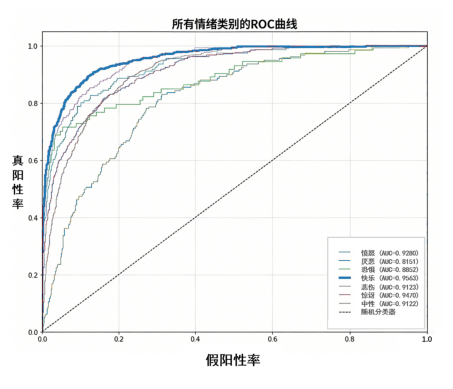

In [7]:
import matplotlib.pyplot as plt

img = plt.imread('red.png')
l = 0.7
mask = (img[..., 0] > l) & (img[..., 1] <= l) & (img[..., 2] <= l)
img[mask, 0] = 0.1216
img[mask, 1] = 0.4667
img[mask, 2] = 0.7059

# 关闭frameon
plt.imshow(img)
plt.axis('off')  # 这会关闭坐标轴和边框
plt.show()

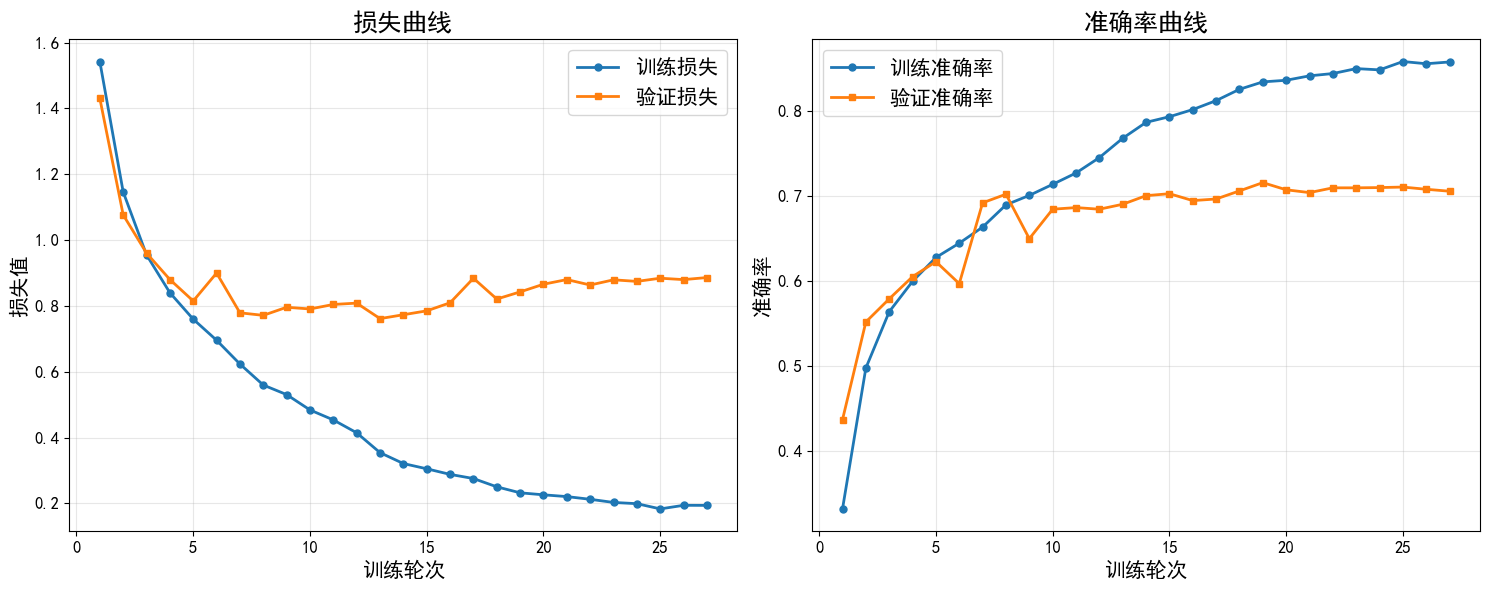

In [3]:
import matplotlib.pyplot as plt

# 颜色配置（可DIY）
COLOR1 = "#1f77b4"  # 蓝色
COLOR2 = "#ff7f0e"  # 橙色

# 数据
train_losses = [1.5427, 1.1465, 0.9551, 0.8401, 0.7597, 0.6957, 0.6234, 0.5595, 0.5305, 0.4838, 0.4535, 0.4144, 0.3540, 0.3209, 0.3050, 0.2880, 0.2754, 0.2502, 0.2320, 0.2259, 0.2205, 0.2123, 0.2027, 0.1990, 0.1831, 0.1940, 0.1938]
val_losses = [1.4308, 1.0767, 0.9604, 0.8802, 0.8150, 0.8999, 0.7790, 0.7713, 0.7959, 0.7907, 0.8044, 0.8085, 0.7614, 0.7732, 0.7850, 0.8095, 0.8841, 0.8209, 0.8426, 0.8659, 0.8800, 0.8635, 0.8793, 0.8745, 0.8842, 0.8799, 0.8862]
train_accuracies = [0.3323, 0.4977, 0.5638, 0.5995, 0.6275, 0.6443, 0.6632, 0.6893, 0.7004, 0.7134, 0.7267, 0.7448, 0.7675, 0.7862, 0.7928, 0.8012, 0.8117, 0.8250, 0.8337, 0.8356, 0.8408, 0.8435, 0.8493, 0.8478, 0.8576, 0.8550, 0.8571]
val_accuracies = [0.4371, 0.5518, 0.5789, 0.6050, 0.6226, 0.5968, 0.6917, 0.7018, 0.6496, 0.6842, 0.6861, 0.6842, 0.6900, 0.7001, 0.7024, 0.6943, 0.6962, 0.7057, 0.7154, 0.7070, 0.7037, 0.7093, 0.7093, 0.7096, 0.7102, 0.7076, 0.7053]

epochs = range(1, 28)

# 中文兼容
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 字体大小配置
LABEL_SIZE = 15
TITLE_SIZE = 18
LEGEND_SIZE = 15
TICK_SIZE = 12

# 创建1×2子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 损失曲线
ax1.plot(epochs, train_losses, color=COLOR1, label='训练损失', marker='o', markersize=5, linewidth=2)
ax1.plot(epochs, val_losses, color=COLOR2, label='验证损失', marker='s', markersize=5, linewidth=2)
ax1.set_xlabel('训练轮次', fontsize=LABEL_SIZE)
ax1.set_ylabel('损失值', fontsize=LABEL_SIZE)
ax1.set_title('损失曲线', fontsize=TITLE_SIZE)
ax1.legend(fontsize=LEGEND_SIZE)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', labelsize=TICK_SIZE)

# 准确率曲线
ax2.plot(epochs, train_accuracies, color=COLOR1, label='训练准确率', marker='o', markersize=5, linewidth=2)
ax2.plot(epochs, val_accuracies, color=COLOR2, label='验证准确率', marker='s', markersize=5, linewidth=2)
ax2.set_xlabel('训练轮次', fontsize=LABEL_SIZE)
ax2.set_ylabel('准确率', fontsize=LABEL_SIZE)
ax2.set_title('准确率曲线', fontsize=TITLE_SIZE)
ax2.legend(fontsize=LEGEND_SIZE)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', labelsize=TICK_SIZE)

plt.tight_layout()
plt.show()

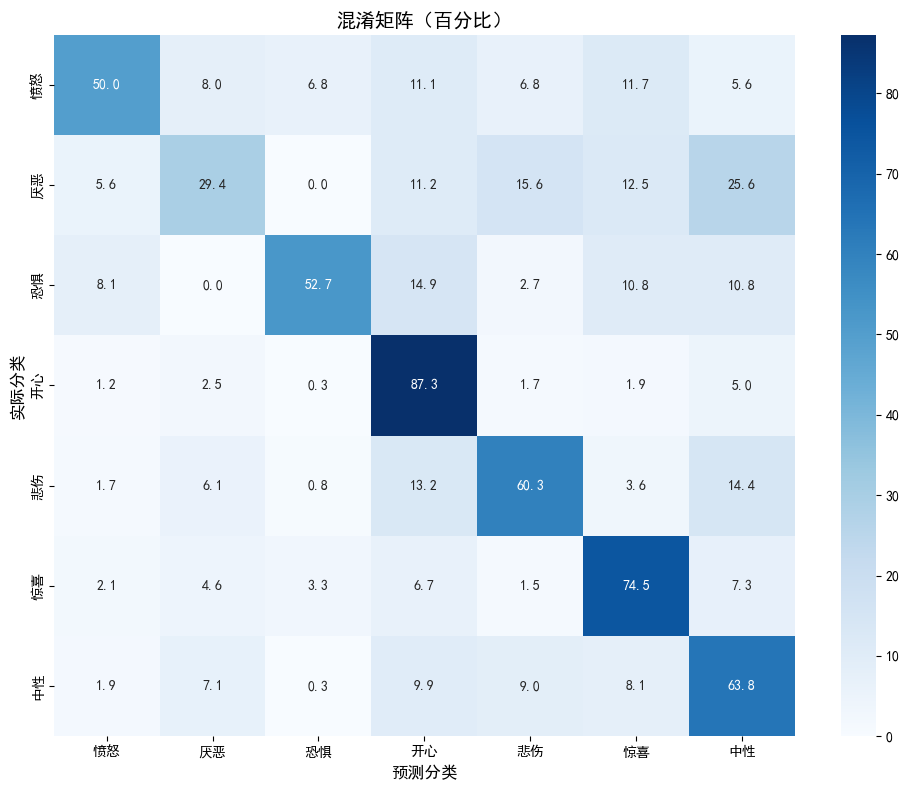

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 混淆矩阵数据（百分比形式）
confusion_matrix = [
    [50.0, 8.0, 6.8, 11.1, 6.8, 11.7, 5.6],
    [5.6, 29.4, 0.0, 11.2, 15.6, 12.5, 25.6],
    [8.1, 0.0, 52.7, 14.9, 2.7, 10.8, 10.8],
    [1.2, 2.5, 0.3, 87.3, 1.7, 1.9, 5.0],
    [1.7, 6.1, 0.8, 13.2, 60.3, 3.6, 14.4],
    [2.1, 4.6, 3.3, 6.7, 1.5, 74.5, 7.3],
    [1.9, 7.1, 0.3, 9.9, 9.0, 8.1, 63.8]
]

# 中文类别标签（注意顺序需要与数据匹配）
# 原始顺序：Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral
classes = ['愤怒', '厌恶', '恐惧', '开心', '悲伤', '惊喜', '中性']

# 创建图形，关闭边框
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8), frameon=False)

# 绘制热力图，使用一位小数格式
sns.heatmap(confusion_matrix, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=classes, yticklabels=classes, ax=ax1)

# 设置中文字体支持（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置标签
ax1.set_ylabel('实际分类', fontsize=12)
ax1.set_xlabel('预测分类', fontsize=12)
ax1.set_title('混淆矩阵（百分比）', fontsize=14)

# 确保热力图本身没有边框
ax1.set_frame_on(False)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()